# ANOVA

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data to Python environment
data = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
data.columns = ['Month','Zone-A','Zone-B','Zone-C','Zone-D']
data.shape

(29, 5)

In [5]:
data = data.set_index('Month')
data.head(5)

,Zone-A,Zone-B,Zone-C,Zone-D
Month,,,,
Month - 1,1483525,1748451,1523308,2267260
Month - 2,1238428,1707421,2212113,1994341
Month - 3,1860771,2091194,1282374,1241600
Month - 4,1871571,1759617,2290580,2252681
Month - 5,1244922,1606010,1818334,1326062


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Month - 1 to Month - 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Zone-A  29 non-null     int64
 1   Zone-B  29 non-null     int64
 2   Zone-C  29 non-null     int64
 3   Zone-D  29 non-null     int64
dtypes: int64(4)
memory usage: 1.1+ KB


In [7]:
# Checking for Null values in the data
data.isnull().sum()

Zone-A    0
Zone-B    0
Zone-C    0
Zone-D    0
dtype: int64

There are no null values in this dataset

In [8]:
np.round(data.describe(),decimals=2) # The values rounded to 2 decimal places

,Zone-A,Zone-B,Zone-C,Zone-D
count,29.00,29.00,29.00,29.00
mean,1540493.14,1755559.59,1772871.03,1842926.76
std,261940.06,168389.89,333193.72,375016.48
min,1128185.00,1527574.00,1237722.00,1234311.00
25%,1305972.00,1606010.00,1523308.00,1520406.00
50%,1534390.00,1740365.00,1767047.00,1854412.00
75%,1820196.00,1875658.00,2098463.00,2180416.00
max,2004480.00,2091194.00,2290580.00,2364132.00


# 1. The mean sales generated by each zone.

In [9]:
 avg_sales = np.mean(data[['Zone-A','Zone-B','Zone-C','Zone-D']]).rename_axis('Zones').reset_index(name='Avg Sales')
print('Average sales generated by each Zone:')
avg_sales.style.format(precision=2).hide_index()

Average sales generated by each Zone:


Zones,Avg Sales
Zone-A,1540493.14
Zone-B,1755559.59
Zone-C,1772871.03
Zone-D,1842926.76


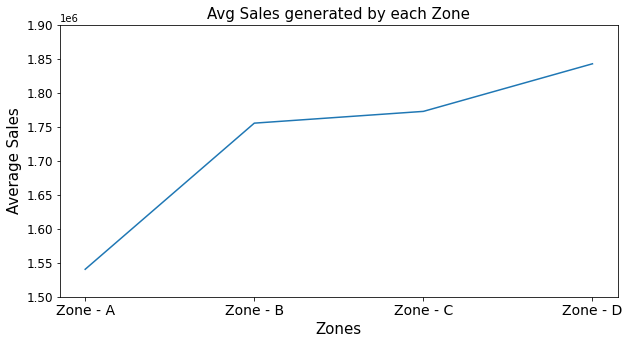

In [10]:
# Plotting a line graph for the same
plt.figure(figsize=(10,5))
plt.plot(avg_sales['Avg Sales'])
plt.title("Avg Sales generated by each Zone",fontsize = 15)
plt.xlabel('Zones',fontsize = 15)
plt.ylabel('Average Sales',fontsize = 15)
plt.xticks([0,1,2,3,],["Zone - A","Zone - B",'Zone - C','Zone - D'],fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylim((1500000,1900000))
plt.show()

*We can see that Zone-D generating the highest average Sales and Zone-A generating the least average Sales.


*The average sales generated by each zone is different.

# 2.Total sales generated by all the zones for each month.

In [11]:
# Calculating the total sum of sales for each month
total_sales = data.sum(axis=1).rename_axis('Month').reset_index(name='Sales')
total_sales.style.hide_index()

Month,Sales
Month - 1,7022544
Month - 2,7152303
Month - 3,6475939
Month - 4,8174449
Month - 5,5995328
Month - 6,7151387
Month - 7,7287108
Month - 8,7816299
Month - 9,6703395
Month - 10,7128210


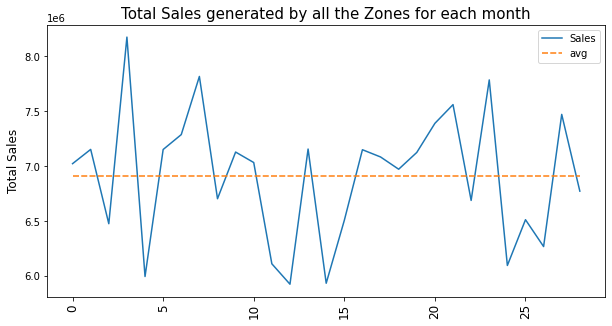

In [12]:
# Plotting a line graph for the sum of sales of each month 
plt.figure(figsize=(10,5))

total_sales['avg'] = total_sales['Sales'].mean() # To draw 'Avgerage' line
sns.lineplot(data = total_sales)

plt.title('Total Sales generated by all the Zones for each month',fontsize = 15)
plt.ylabel('Total Sales',fontsize = 12)
plt.xticks(rotation = 90,fontsize = 12)
plt.show()

We can see that the 'Month - 4' generated the highest Sales and 'Month - 13' the minimum.

There is significance variation in the total sales generated by all the zones for each month.

# 3.Check whether all the zones generate the same amount of sales.

In [13]:
# Importing the necessary library to conduct one-way f-test
import scipy
from scipy.stats import f_oneway

In [14]:
# Defining our Hypothesis for testing

Null Hypothesis H0 : μ1 = μ2 = μ3 = μ4, that means, all the means of different groups are equal
Alternative Hypothesis Ha : at least one population mean is different from the rest

In [15]:
# Set the alpha value or the Level of significance
alpha = .05

In [16]:
Zone_A = np.array(data['Zone-A'])
Zone_B = np.array(data['Zone-B'])
Zone_C = np.array(data['Zone-C'])
Zone_D = np.array(data['Zone-D'])

In [17]:
# Calculating f-statistic and p-value
F_stat, p_value = f_oneway(Zone_A,Zone_B,Zone_C,Zone_D)
print('F-Statistics',"%.3f"% F_stat)
print('P-Value',"%.3f"% p_value)

F-Statistics 5.672
P-Value 0.001


In [18]:
# Comparing the P-Value with our alpha value to test the significance of null hypothesis
if p_value <= alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

Reject null hypothesis


The F test statistic is 5.672 and the corresponding P-value is 0.001. Since the P-value is less than .05, we reject the null hypothesis.

This means that the average sale amounts generated by the Zones [Zone A, Zone B, Zone C, and Zone D] are different.